# Predicting Physical Activities from Smartphone Accelerometer Data: A Machine Learning Approach

In [160]:
pwd # to see if the file directory has the correct address

'/home/egeozmeral/Desktop/Python/Using Python for Research/Final Project'

In [161]:
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from timeit import default_timer as timer

start = timer()
end = timer()
print(end - start)

1.1579002602957189e-05


In [78]:
train_time_series = pd.read_csv("train_time_series.csv")

train_time_series

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450
...,...,...,...,...,...,...,...
3739,24325,1565110305638,2019-08-06T16:51:45.638,unknown,0.024384,-0.710709,0.030304
3740,24326,1565110305738,2019-08-06T16:51:45.738,unknown,0.487228,-1.099136,-0.015213
3741,24327,1565110305838,2019-08-06T16:51:45.838,unknown,0.369446,-0.968506,0.036713
3742,24328,1565110305939,2019-08-06T16:51:45.939,unknown,0.167877,-0.802826,0.049805


In [128]:
train_labels = pd.read_csv("train_labels.csv")

train_labels

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1
...,...,...,...,...
370,24289,1565110302030,2019-08-06T16:51:42.030,4
371,24299,1565110303032,2019-08-06T16:51:43.032,4
372,24309,1565110304034,2019-08-06T16:51:44.034,4
373,24319,1565110305037,2019-08-06T16:51:45.037,4


## Data Manipulation

In [156]:
train_time_series['magnitude'] = np.sqrt(x**2 + y**2 + z**2)
magnitude = train_time_series['magnitude']
magnitude

0       0.937429
1       1.021548
2       1.037644
3       0.991568
4       1.012993
          ...   
3739    0.711772
3740    1.202382
3741    1.037228
3742    0.821701
3743    1.207720
Name: magnitude, Length: 3744, dtype: float64

In [130]:
merged_data = pd.merge(train_time_series, train_labels, on="timestamp", how="inner")

merged_data

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label
0,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,unknown,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,unknown,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,unknown,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,unknown,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1
...,...,...,...,...,...,...,...,...,...,...
370,24289,1565110302030,2019-08-06T16:51:42.030,unknown,-0.641953,-1.469177,0.301041,24289,2019-08-06T16:51:42.030,4
371,24299,1565110303032,2019-08-06T16:51:43.032,unknown,-0.171616,-0.366074,-0.059082,24299,2019-08-06T16:51:43.032,4
372,24309,1565110304034,2019-08-06T16:51:44.034,unknown,0.401810,-1.077698,0.258911,24309,2019-08-06T16:51:44.034,4
373,24319,1565110305037,2019-08-06T16:51:45.037,unknown,0.330338,-1.470062,0.303894,24319,2019-08-06T16:51:45.037,4


## Statistical Summary

In [151]:
mean_x = x.mean(); mean_y = y.mean(); mean_z = z.mean()
print(mean_x, mean_y, mean_z)

std_x = x.std(); std_y = y.std(); std_z = z.std()
print(std_x, std_y, std_z)

median_x = x.median(); median_y = y.median(); median_z = z.median()
print(median_x, median_y, median_z)

0.19582144419352213 -1.005255580967308 0.08443472528050089
0.3956977277739057 0.4511784714829794 0.350817476211766
0.1617279052734375 -0.9580154418945312 0.05211639404296875


## Visualization

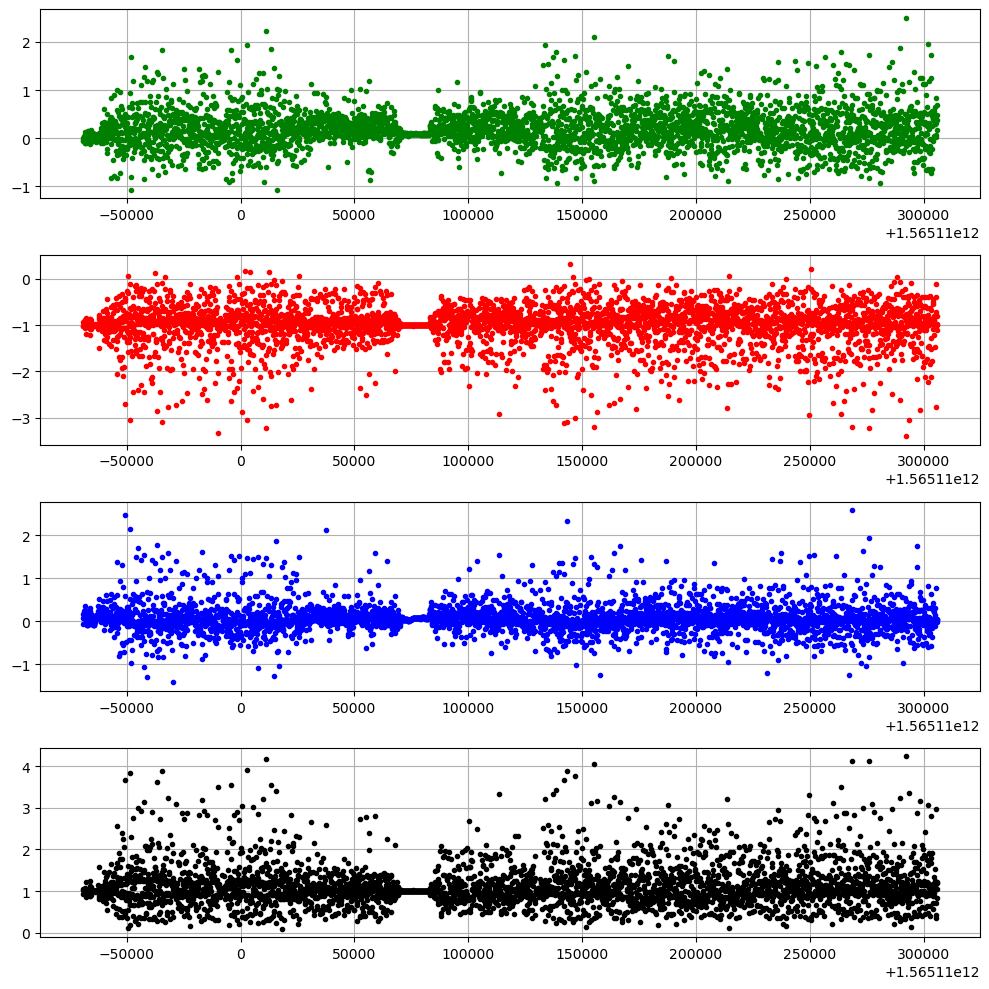

In [165]:
x = train_time_series.x
y = train_time_series.y
z = train_time_series.z

t = train_time_series["timestamp"]

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

axes[0].plot(t,x,"g.")
axes[0].grid()

axes[1].plot(t,y,"r.")
axes[1].grid()

axes[2].plot(t,z,"b.")
axes[2].grid()

axes[3].plot(t,magnitude,"k.")
axes[3].grid()

plt.tight_layout()
plt.show()

In [137]:
mean_x = train_time_series['x'].mean()
mean_y = train_time_series['y'].mean()
mean_z = train_time_series['z'].mean()
print(mean_x, mean_y, mean_z)

std_x = train_time_series['x'].std()
std_y = train_time_series['y'].std()
std_z = train_time_series['z'].std()
print(std_x, std_y, std_z)

median_x = train_time_series['x'].median()
median_y = train_time_series['y'].median()
median_z = train_time_series['z'].median()
print(median_x, median_y, median_z)

0.19582144419352213 -1.005255580967308 0.08443472528050089
0.3956977277739057 0.4511784714829794 0.350817476211766
0.1617279052734375 -0.9580154418945312 0.05211639404296875


In [138]:
test_time_series = pd.read_csv("test_time_series.csv")

test_time_series

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550
...,...,...,...,...,...,...,...
1245,25575,1565110430975,2019-08-06T16:53:50.975,unknown,0.036499,-0.724823,0.553802
1246,25576,1565110431075,2019-08-06T16:53:51.075,unknown,-0.159241,0.307022,0.142410
1247,25577,1565110431175,2019-08-06T16:53:51.175,unknown,-0.037964,-0.673706,1.065445
1248,25578,1565110431275,2019-08-06T16:53:51.275,unknown,0.255707,-1.485397,-0.013336


In [82]:
test_labels = pd.read_csv("test_labels.csv")

test_labels

,Unnamed: 0,timestamp,UTC time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN
...,...,...,...,...
120,25539,1565110427366,2019-08-06T16:53:47.366,NaN
121,25549,1565110428369,2019-08-06T16:53:48.369,NaN
122,25559,1565110429371,2019-08-06T16:53:49.371,NaN
123,25569,1565110430373,2019-08-06T16:53:50.373,NaN
